<a href="https://colab.research.google.com/github/TERE-20/Inteligencia-Artificial/blob/main/PerceptronIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron:
implementacion del algoritmo donde aprende dos clases (setosa, versicolor).

## Librerias

* **NumPy** para operaciones con matrices y algebra lineal.

* **Pandas** para manipulacion de datos. (para este caso se usa para cargar y procesar el conjunto de datos Iris).

* **Matplotlib** visualiza sus datos.

In [56]:
from IPython.display import Image

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01, n_inter=50, random_state=1):
        self.eta = eta
        self.n_inter = n_inter
        self.random_state = random_state


    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + x.shape[1])
        self.error_ = []


        for _ in range(self.n_inter):
            errors = 0
            for xi, target in zip(x, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.error_.append(errors)
        return self

    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)


v1 = np.array([1, 2, 3])
v2 = 0.5 * v1

np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


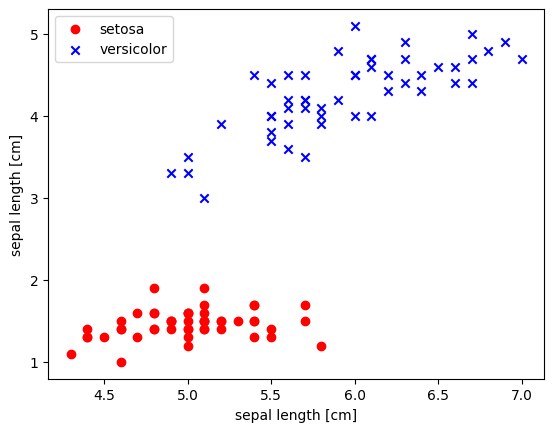

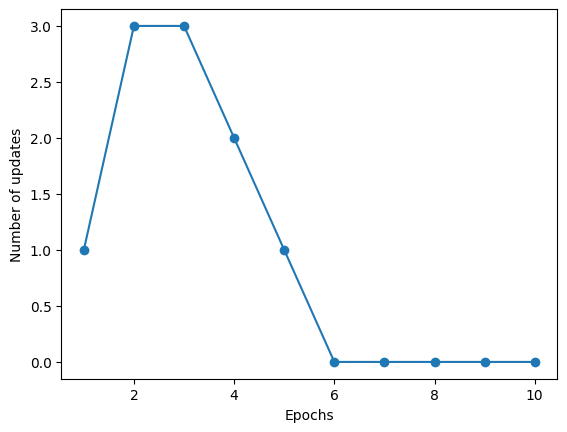

In [57]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

x = df.iloc[0:100, [0, 2]].values

plt.scatter(x[:50, 0], x[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')

plt.show()

ppn = Perceptron(eta=0.1, n_inter=10)
ppn.fit(x, y)

plt.plot(range(1, len(ppn.error_) + 1), ppn.error_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Este constructor inicializa el perceton con 3 parametros:

* eta: tasa de aprendizaje, que controla cuando se ajustan los pesos en cada paso.
* n_iter: numero de interaciones o epocas.
* random_syate: garantiza reproducibilidad, inicializa los pesos de manera aleatoria.

**Metodo FIT:** ajusta los datos de entrenamiento.
la variable X es la matriz de caractweristicas con y son sus etiquetas correspondientes.

**self.e_:** se inicializa los pesos aleatoriamente.
en el vector w_ se incluye un peso adicional para el sesgo en la posicion w_[0].

**update, self.w_[1:], self.w_[0]:** evalua si la prediccion no coincide con un valor real, se ajusta los pasos de forma proporcional entre la prediccion y el valor del objeto [xi] multiplicado por la taza de aprendizaje, y los errores de almacenan en la lista errors_ para cada epoca.

**METODOS AUXILIARES**

* net_input: calcula la suma ponderada de las entradas y los pesos.
* predict: devuelve la prediccion de la clase (-1 o 1) aplicando la funcion de activacion.

calcula el angulo en radianes entre dos vectores v1 y v2 usando el coseno del angulo.
df: carga el conjunto de datos iris que contienen 150 ejemplos de tres especies de iris (setosa, versicolor, viginica), para este ejemplo solo tomaremos 100 (50 setosa y 50 versicolor)